# Imports

In [1]:
from importlib import reload
import functions as f

# for data handling
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [2]:
# General

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# Ridge(alpha=a, normalize=True)
from sklearn.linear_model import Lasso
# Lasso(alpha = alpha[i], normalize=True, max_iter = 1000000)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
# Classification

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# tree_clf = DecisionTreeClassifier(max_depth = 3)
# fig = tree_clf.fit(X, y)
# tree.plot_tree(fig,filled = True)
# plt.show()
# tree_clf.predict_proba(X)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.svm import LinearSVC # LinearSVC(C=1, loss="hinge")
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=5)
# neigh.fit(X,y)

In [5]:
# Unsupervised learning

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# pca.explained_variance_ratio_
# plt.matshow(pca_pipe['pca'].components_, cmap = 'plasma')

from sklearn.manifold import MDS
# mds = MDS(n_components = 2)
# X_mds = mds.fit_transform(X)

from sklearn.manifold import LocallyLinearEmbedding
# lle = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
# X_lle = lle.fit_transform(X)

from sklearn.manifold import Isomap
# iso = Isomap(n_neighbors=160, n_components=2)
# X_iso = iso.fit_transform(X)

from sklearn.manifold import TSNE
# tsne = TSNE(n_components = 2, perplexity=50)
# X_tsne = tsne.fit_transform(X)

In [7]:
# For reloading our functions library if anything is changed
f = reload(f)

# Work

## Importing Data

In [29]:
df = pd.read_csv('Nicks_magnus_nihal.csv')
df_copy = df.copy()
X = df_copy.drop(columns = ['game_id','white_player'])
y = df_copy['white_player']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)
X_train.head()

,wn_pair,wn_outpost,wn_repositioning,wn_mobility,wb_pair,wk_side_fianchetto,wq_side_fianchetto,wb_mobility,wlong_diagonal_control,wopposite_color_b,...,num_direct_trades,num_indirect_trades,num_direct_trades_white,num_indirect_trades_white,avg_time_between_direct_trade,exchanges_possible,king_squares_attacked,king_moves,king_moves_weighted,distance_from_king
961,0,0.0,0.098367,1.960000,0,1,1,2.080000,0.960000,-1,...,4,1,2,1,1.00,0.357143,1.360000,1,22,3.318551
259,0,0.0,0.008154,2.527778,0,0,0,2.277778,0.666667,-1,...,5,0,2,0,1.00,0.896552,0.277778,1,27,3.302751
358,0,0.0,0.069735,2.541667,0,0,1,1.416667,0.666667,0,...,5,1,1,0,1.25,0.294118,0.416667,1,32,3.515495
150,0,0.0,0.030756,0.222222,1,0,0,2.962963,0.074074,-1,...,5,1,3,0,1.00,0.593750,0.592593,0,0,3.407355
190,0,0.0,0.173594,1.976744,0,0,0,3.651163,0.000000,-1,...,3,1,1,1,1.50,0.378378,0.627907,2,60,3.090504


In [32]:
y_train.head()

961     Nihal
259    Magnus
358    Magnus
150    Magnus
190    Magnus
Name: white_player, dtype: object

## Dimensionality reduction

### PCA

In [118]:
n = 50
pca_pipe = Pipeline([('scale',StandardScaler()), ('pca',PCA(n_components = n))])
X_train_pipe = pca_pipe.fit_transform(X_train,y_train)

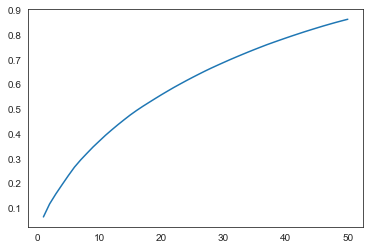

In [119]:
plt.plot(np.arange(1,n+1),np.cumsum(pca_pipe['pca'].explained_variance_ratio_))

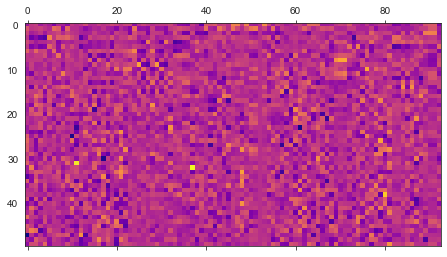

In [120]:
plt.matshow(pca_pipe['pca'].components_, cmap = 'plasma')
plt.show()

## Classification

### Nearest Neighbors

In [137]:
neigh_pipe = Pipeline([('scaler',StandardScaler()),('neigh',KNeighborsClassifier(n_neighbors = 9))])
neigh_pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('neigh',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=9, p=2,
                                      weights='uniform'))],
         verbose=False)

In [138]:
pred = neigh_pipe.predict(X_test)

In [139]:
sum(pred==y_test)/len(y_test)

0.6700507614213198

### Decision Tree

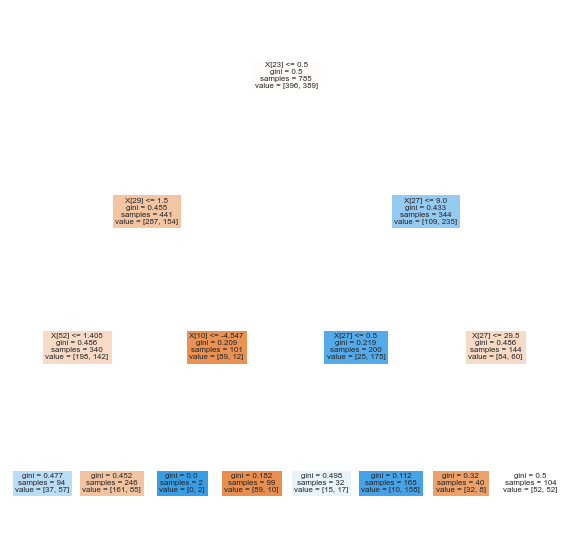

In [157]:
tree_clf = DecisionTreeClassifier(max_depth = 3)
fig, ax = plt.subplots(figsize=(10, 10))
fig = tree_clf.fit(X_train, y_train)
tree.plot_tree(fig,filled = True,ax=ax)
plt.show()

In [158]:
pred = tree_clf.predict(X_test)
sum(pred==y_test)/len(y_test)

0.7055837563451777

In [160]:
X_colns = X.columns

In [162]:
i=23
print(i,X_colns[i])
i=29
print(i,X_colns[i])
i=27
print(i,X_colns[i])
i=52
print(i,X_colns[i])
i=10
print(i,X_colns[i])
i=27
print(i,X_colns[i])
i=27
print(i,X_colns[i])

23 A
29 C#
27 A#
52 wb_rank
10 b_p_coherency
27 A#
27 A#


So the decision tree is finding that the opening is pretty important for prediction

### Custom: by opening

For each opening type (A,B,C,D,E) I'll classify it as Magnus or Nihal (based on who did that opening the most often). Then check how predictive that is.

In [184]:
magnus_openings = [0,0,0,0,0]
magnus_train = X_train.loc[y_train == 'Magnus']
magnus_openings[0] = sum(magnus_train['A'] == 1) / len(magnus_train)
magnus_openings[1] = sum(magnus_train['B'] == 1) / len(magnus_train)
magnus_openings[2] = sum(magnus_train['C'] == 1) / len(magnus_train)
magnus_openings[3] = sum(magnus_train['D'] == 1) / len(magnus_train)
magnus_openings[4] = 1 - sum(magnus_openings)
magnus_openings

[0.27525252525252525,
 0.20202020202020202,
 0.23232323232323232,
 0.18686868686868688,
 0.10353535353535359]

In [185]:
nihal_openings = [0,0,0,0,0]
nihal_train = X_train.loc[y_train == 'Nihal']
nihal_openings[0] = sum(nihal_train['A'] == 1) / len(nihal_train)
nihal_openings[1] = sum(nihal_train['B'] == 1) / len(nihal_train)
nihal_openings[2] = sum(nihal_train['C'] == 1) / len(nihal_train)
nihal_openings[3] = sum(nihal_train['D'] == 1) / len(nihal_train)
nihal_openings[4] = 1 - sum(nihal_openings)
nihal_openings

[0.6041131105398457,
 0.07455012853470437,
 0.038560411311053984,
 0.1953727506426735,
 0.08740359897172234]

In [186]:
opening_pred = ['','','','','']
for i in range(5):
    if magnus_openings[i] > nihal_openings[i]:
        opening_pred[i] = 'Magnus'
    else:
        opening_pred[i] = 'Nihal'
opening_pred

['Nihal', 'Magnus', 'Magnus', 'Nihal', 'Magnus']

In [210]:
pred = y_test.copy()
for i in range(len(X_test)):
    openings = list(X_test[['A','B','C','D']].iloc[i])
    openings.append(1-sum(openings))
    opening_index = np.argmax(openings)
    pred.iloc[i] = opening_pred[opening_index]

In [211]:
pred

1277    Magnus
8        Nihal
1840     Nihal
1565     Nihal
743     Magnus
         ...  
1285     Nihal
1297     Nihal
1969    Magnus
1766     Nihal
24      Magnus
Name: white_player, Length: 197, dtype: object

In [213]:
sum(pred==y_test)/len(y_test)

0.700507614213198

In [219]:
import sklearn

guesses = pred
actual = y_test

labels = ['Magnus','Nihal']

c_matrix = np.round(sklearn.metrics.confusion_matrix(actual,guesses,labels = labels) / len(y_test),2)

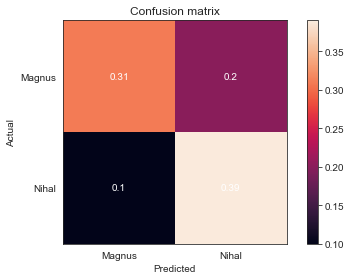

In [220]:
fig, ax = plt.subplots()
im = ax.imshow(c_matrix)

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Axes labels
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, c_matrix[i, j],
                       ha="center", va="center", color="w")

fig.colorbar(im)
        
ax.set_title("Confusion matrix")
fig.tight_layout()
plt.show()